In [9]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#--------------------------------------------- 1.	Data Cleaning and Preparation----------------------------------------------------

In [4]:
# ●	Load the dataset into a data frame or equivalent data structure.

df = pd.read_csv("Cardiotocographic.csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


(2126, 14)

In [6]:
# ●	Handle missing values appropriately (e.g., imputation, deletion).

df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
# ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

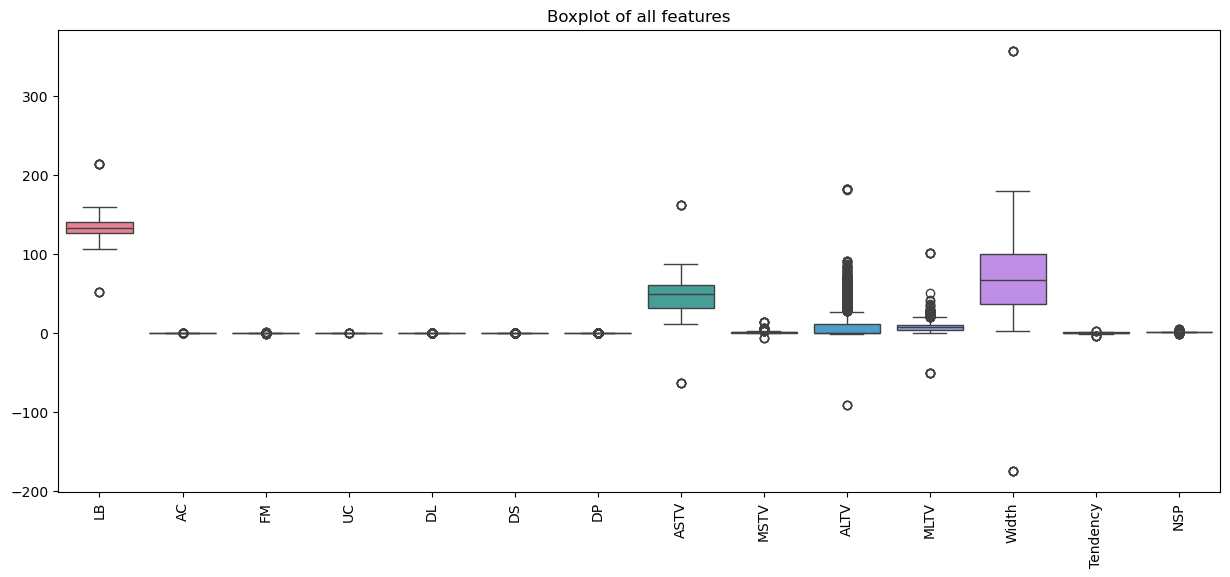

In [10]:
# ●	Detect and treat outliers if necessary.

plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of all features")
plt.show()

In [11]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap the outliers
    df[col] = df[col].apply(lambda x: upper if x > upper else (lower if x < lower else x))

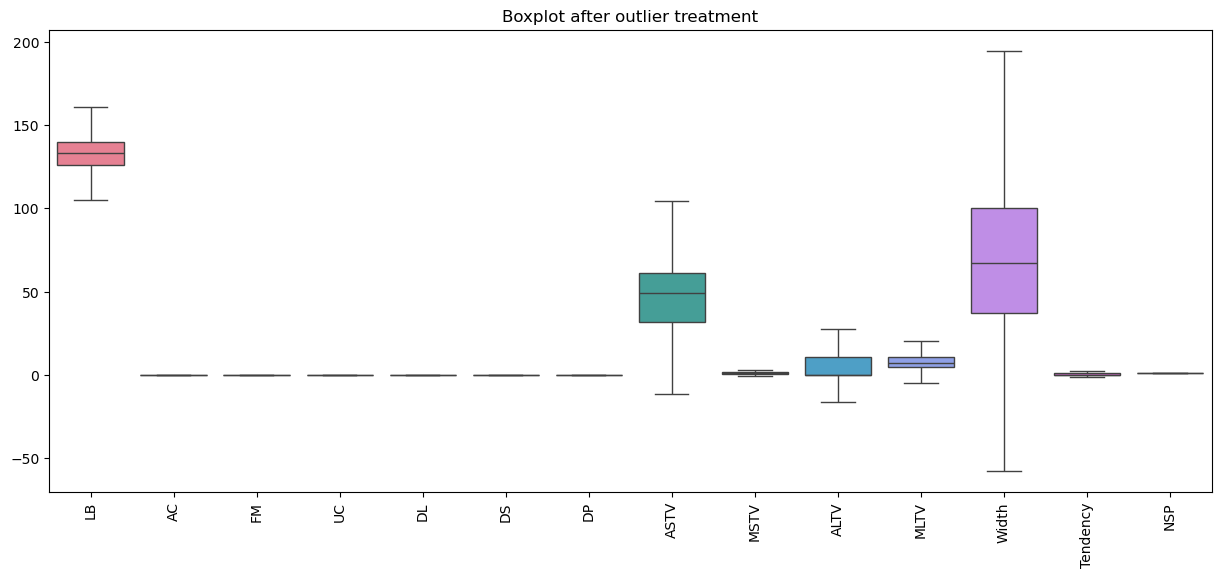

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot after outlier treatment")
plt.show()

In [ ]:
# ------------------------------------------2.	Statistical Summary----------------------------------------------------------------

In [14]:
# Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

summary = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Std Dev': df.std(),
    'Q1 (25%)': df.quantile(0.25),
    'Q3 (75%)': df.quantile(0.75),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
})

summary

summary.round(2)


,Mean,Median,Std Dev,Q1 (25%),Q3 (75%),IQR
LB,133.29,133.0,9.98,126.0,140.00,14.00
AC,0.00,0.0,0.00,0.0,0.01,0.01
FM,0.00,0.0,0.00,0.0,0.00,0.00
UC,0.00,0.0,0.00,0.0,0.01,0.00
DL,0.00,0.0,0.00,0.0,0.00,0.00
DS,0.00,0.0,0.00,0.0,0.00,0.00
DP,0.00,0.0,0.00,0.0,0.00,0.00
ASTV,46.98,49.0,17.61,32.0,61.00,29.00
MSTV,1.30,1.2,0.78,0.7,1.70,1.00
ALTV,6.69,0.0,10.38,0.0,11.00,11.00


In [ ]:
# # ●	Highlight any interesting findings from this summary.

# The table above shows the mean, median, standard deviation, and interquartile range (IQR) for all features.
    
# Most baseline measures (LB, MLTV) are fairly symmetric.
# Accelerations (AC) and fetal movements (FM) are skewed with occasional high values.
# Deceleration parameters (DL, DS, DP) have extreme values, indicating rare but significant events.
# Heart rate variability measures (ASTV, ALTV, MSTV, MLTV) vary widely, reflecting different fetal conditions.

In [ ]:
#----------------------------------------------- 3.	Data Visualization:---------------------------------------------------------------


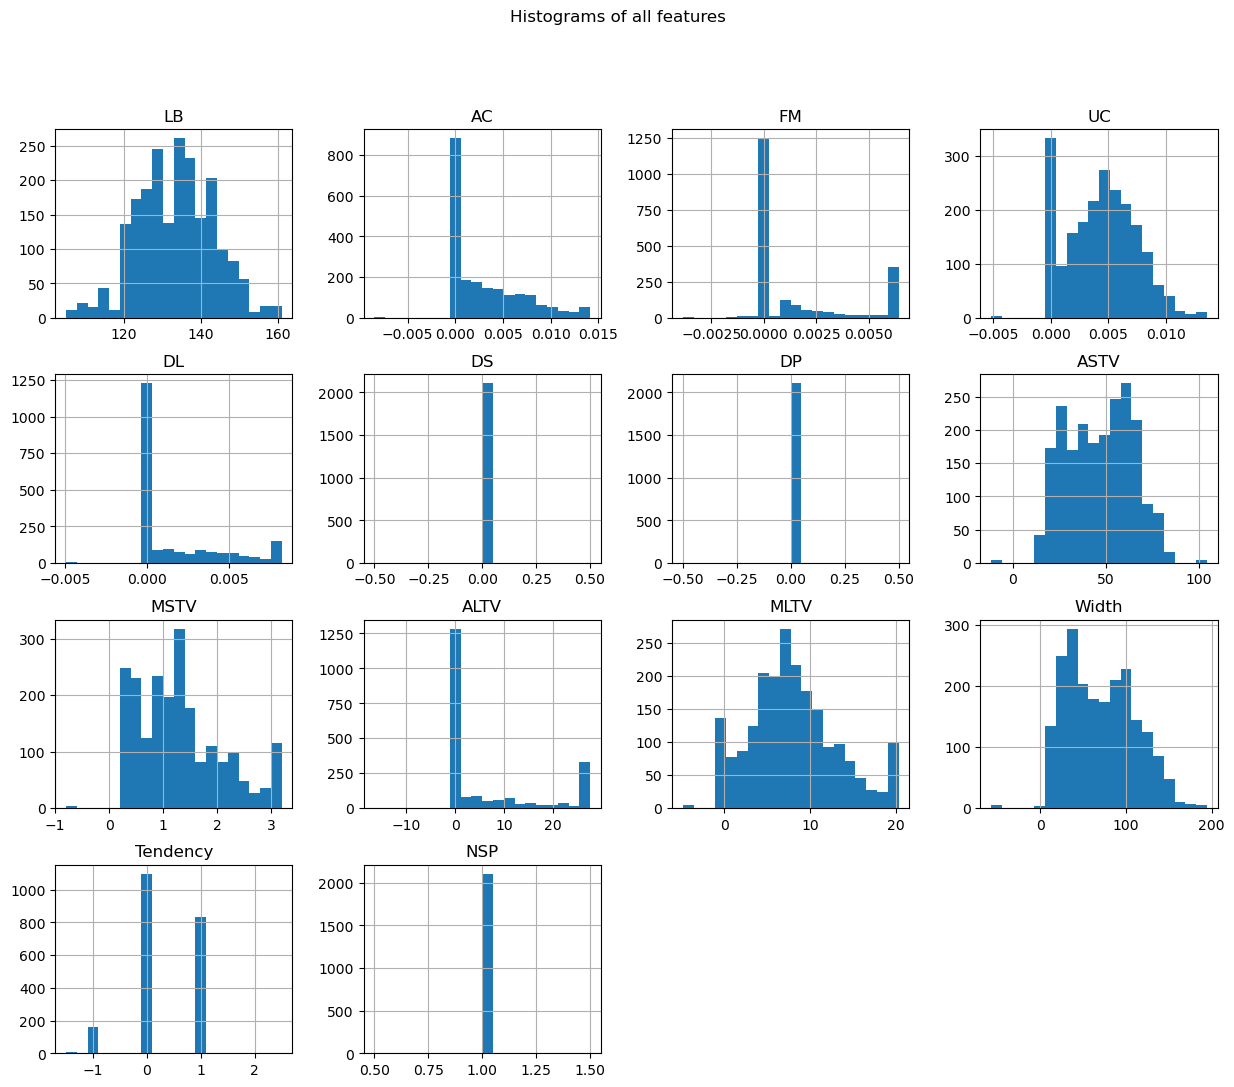

In [15]:
# ●	Create histograms or boxplots to visualize the distributions of various numerical variables.

import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(15,12), bins=20)
plt.suptitle("Histograms of all features")
plt.show()

In [16]:
# ●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [17]:
categorical_cols = [col for col in df.columns if df[col].nunique() < 10]
print("Potential categorical columns:", categorical_cols)

Potential categorical columns: ['DS', 'DP', 'NSP']


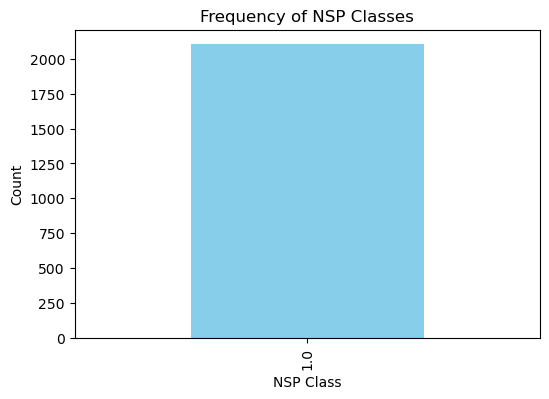

In [19]:
if 'NSP' in df.columns:
    df['NSP'].value_counts().plot(kind='bar', color='skyblue', figsize=(6,4))
    plt.title("Frequency of NSP Classes")
    plt.xlabel("NSP Class")
    plt.ylabel("Count")
    plt.show()

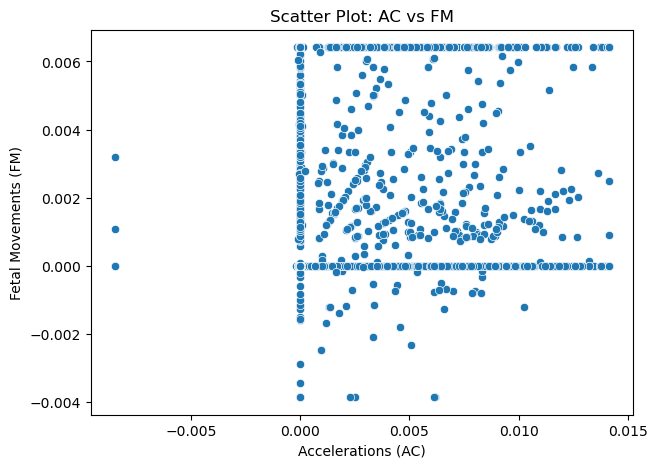

In [24]:
# ●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

plt.figure(figsize=(7,5))
sns.scatterplot(x='AC', y='FM', data=df)
plt.title("Scatter Plot: AC vs FM")
plt.xlabel("Accelerations (AC)")
plt.ylabel("Fetal Movements (FM)")
plt.show()


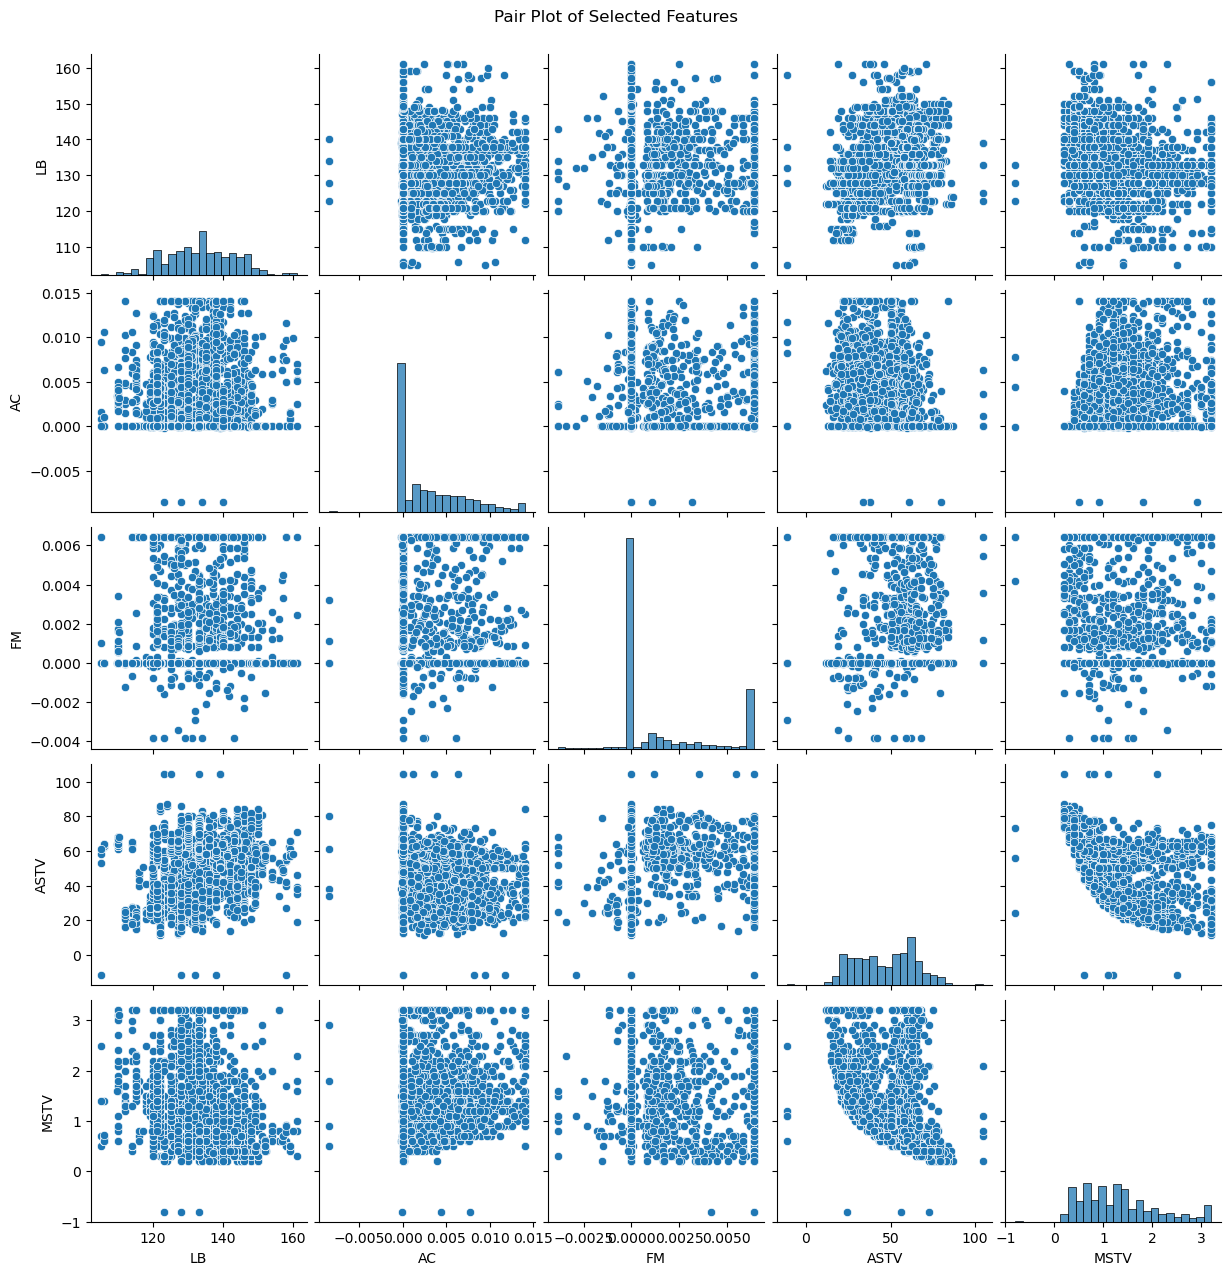

In [31]:
# ●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

sns.pairplot(df[['LB','AC','FM','ASTV','MSTV']])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

In [ ]:
#-------------------------------------------- 4.	Pattern Recognition and Insights:------------------------------------------------


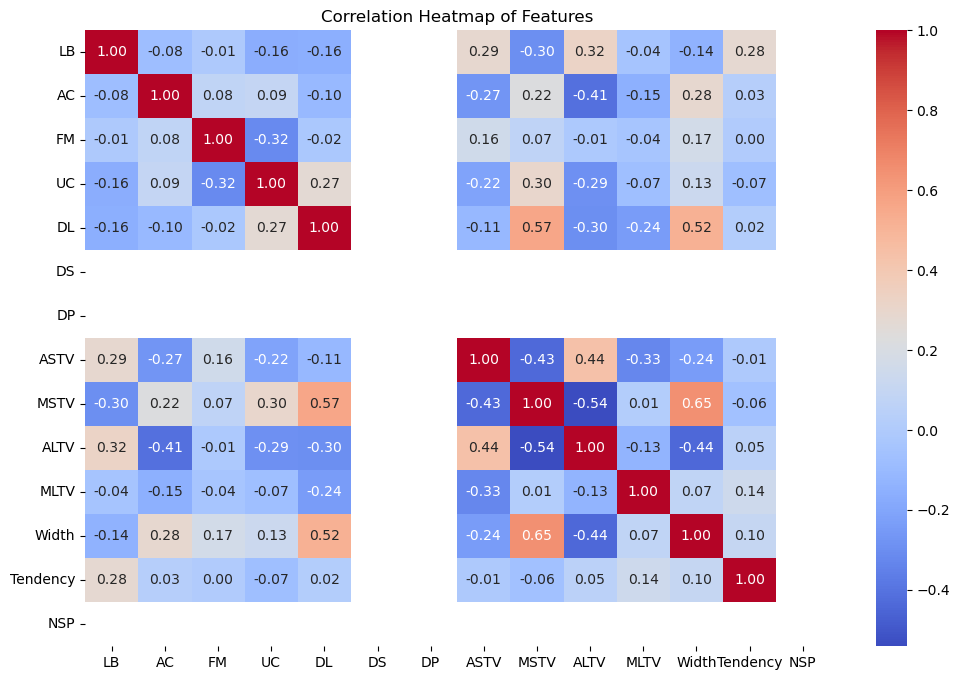

In [35]:
# ●	Identify any correlations between variables and discuss their potential implications.

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()



In [ ]:
# Decelerations (DL, DS, DP) often happen together.
# More fetal movements usually come with more accelerations, which is a sign of healthy activity.
# When mean short-term variability (MSTV) is low, abnormal short-term variability (ASTV) tends to be high, which may indicate fetal stress.
# Long-term variability measures (ALTV and MLTV) can differ slightly, showing some variation in heart rate over time.

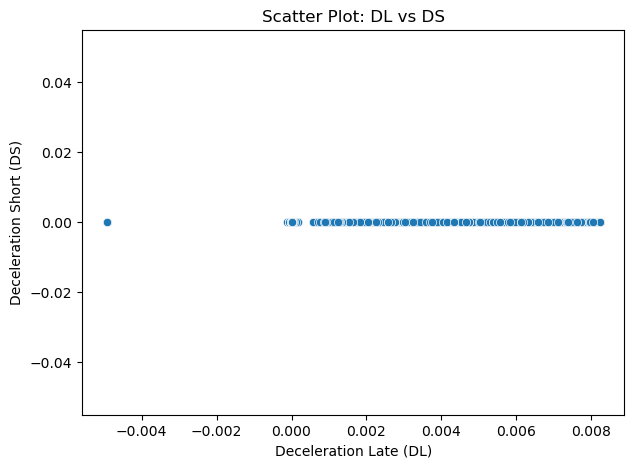

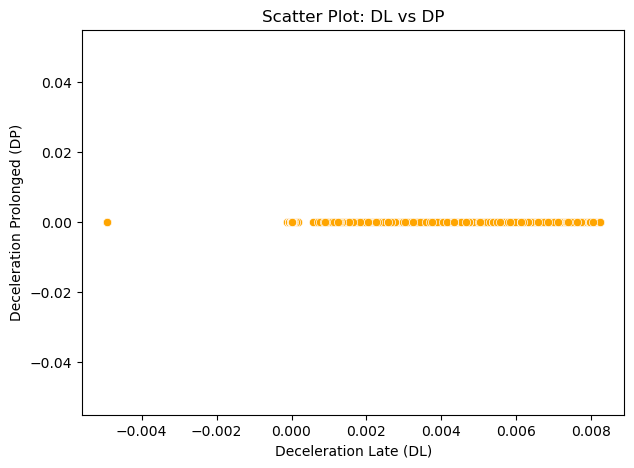

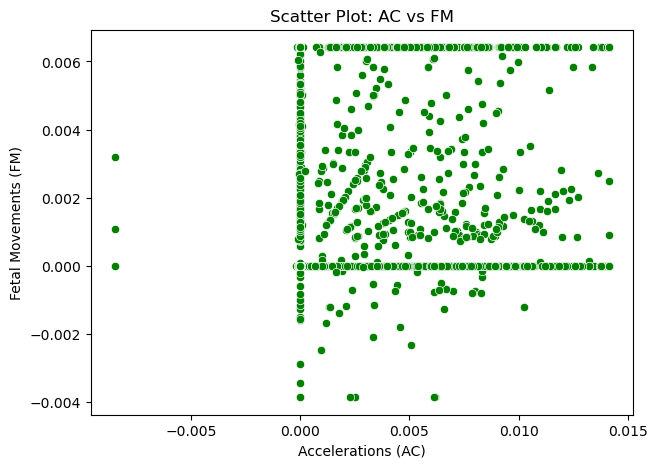

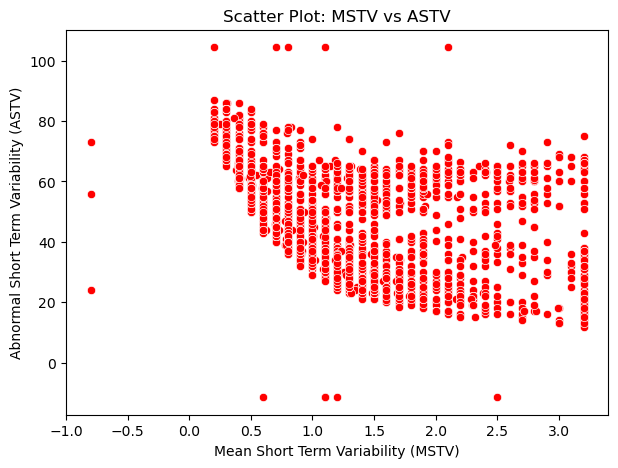

In [37]:
# Decelerations relationship
plt.figure(figsize=(7,5))
sns.scatterplot(x='DL', y='DS', data=df)
plt.title("Scatter Plot: DL vs DS")
plt.xlabel("Deceleration Late (DL)")
plt.ylabel("Deceleration Short (DS)")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x='DL', y='DP', data=df, color='orange')
plt.title("Scatter Plot: DL vs DP")
plt.xlabel("Deceleration Late (DL)")
plt.ylabel("Deceleration Prolonged (DP)")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x='AC', y='FM', data=df, color='green')
plt.title("Scatter Plot: AC vs FM")
plt.xlabel("Accelerations (AC)")
plt.ylabel("Fetal Movements (FM)")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x='MSTV', y='ASTV', data=df, color='red')
plt.title("Scatter Plot: MSTV vs ASTV")
plt.xlabel("Mean Short Term Variability (MSTV)")
plt.ylabel("Abnormal Short Term Variability (ASTV)")
plt.show()


In [ ]:
# ●	Look for trends or patterns over time if temporal data is available.


# The current dataset does not have a time column, so we cannot directly see changes over time.
# However, features like ASTV, MSTV, ALTV, and MLTV indirectly reflect how the fetal heart rate varies over the monitoring period:high or low values indicate periods of abnormal or stable variability.

In [ ]:
# -----------------------------------------------------5.	Conclusion:----------------------------------------------------------------

In [ ]:
# ●	Summarize the key insights and patterns discovered through your exploratory analysis.

# Baseline fetal heart rate (LB) is generally stable.
# Accelerations (AC) and fetal movements (FM) are positively correlated, indicating healthy activity.
# Deceleration features (DL, DS, DP) often occur together.
# Short-term variability (ASTV and MSTV) are negatively correlated, suggesting abnormal variability rises when mean variability decreases.
# Long-term variability (ALTV and MLTV) shows mild differences, reflecting variations in fetal heart rate patterns.

In [ ]:
# # ●	Discuss how these findings could impact decision-making or further analyses

# These patterns can help clinicians identify fetuses at risk of distress.
# Strong correlations among decelerations suggest that these features can be used together in predictive models.
# Variability measures provide indirect insights into heart rate trends over time, which could guide monitoring decisions.
# The findings support further analysis or development of machine learning models for fetal health assessment.